# Introduction

In [4]:
print("NYC Taxi Trip Duration Prediction Project\n")
print("In this project, we will analyze the NYC Taxi Trip dataset to predict the ride duration of taxi trips.")
print("The dataset contains various features such as pickup time, geo-coordinates, and passenger count.")
print("Our goal is to build a predictive model that can accurately estimate the total ride duration.")


NYC Taxi Trip Duration Prediction Project

In this project, we will analyze the NYC Taxi Trip dataset to predict the ride duration of taxi trips.
The dataset contains various features such as pickup time, geo-coordinates, and passenger count.
Our goal is to build a predictive model that can accurately estimate the total ride duration.


# Reading Data

In [5]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the testing dataset
test_data = pd.read_csv('test.csv')

# Display basic information about the training dataset
print(train_data.info())

# Display summary statistics for the training dataset
print(train_data.describe())

# Check for missing values in the training dataset
print(train_data.isnull().sum())

# Display basic information about the testing dataset
print(test_data.info())

# Display summary statistics for the testing dataset
print(test_data.describe())

# Check for missing values in the testing dataset
print(test_data.isnull().sum())

# Identify potential outliers
# You can use box plots or other visualization techniques to identify outliers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean 

## Check coloumns

In [ ]:
print("Columns in Training Dataset:", train_data.columns)
print("Columns in Test Dataset:", test_data.columns)


Columns in Training Dataset: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
Columns in Test Dataset: Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')


# Train Data

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Separate features and target variable for testing data
X_test = test_data.copy()

# Define preprocessing steps (same as before)
numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
numeric_transformer = StandardScaler()

categorical_features = ['vendor_id']  # You might have more categorical features
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)

    ])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['trip_duration'])
y_train = train_data['trip_duration']

# Define preprocessing steps
numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
numeric_transformer = StandardScaler()

categorical_features = ['vendor_id']  # You might have more categorical features
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression model
model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


# Preprocess the test data
X_test_preprocessed = preprocessor.fit_transform(X_test)  # Use fit_transform instead of transform



# Data Visualisation

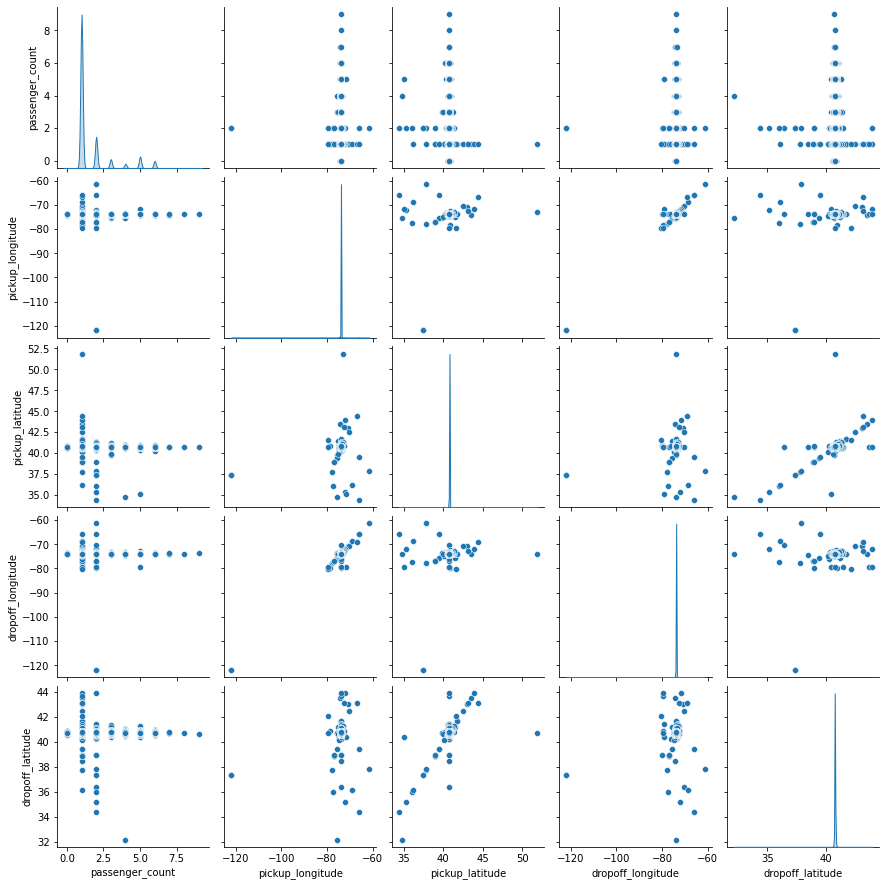

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationships between variables
sns.pairplot(train_data, vars=numeric_features, diag_kind='kde')
plt.show()

# Create other relevant visualizations (scatterplots, histograms, etc.) to explore data relationships


## Scatter Plot

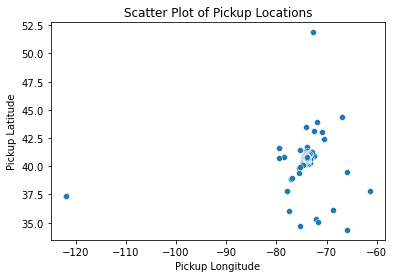

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=train_data)
plt.title('Scatter Plot of Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()


## Histogram

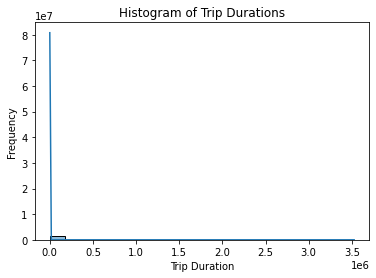

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
sns.histplot(data=train_data, x='trip_duration', bins=20, kde=True)
plt.title('Histogram of Trip Durations')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()


## Box Plot

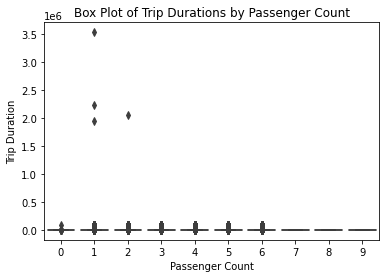

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
sns.boxplot(x='passenger_count', y='trip_duration', data=train_data)
plt.title('Box Plot of Trip Durations by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.show()


## Correlation Matrix

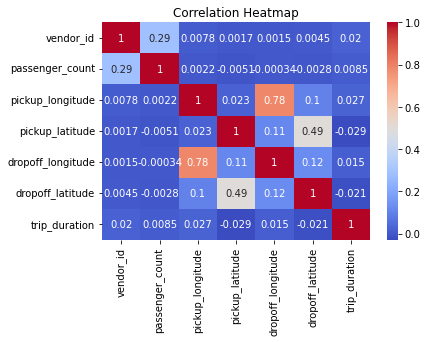

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## KDE plot

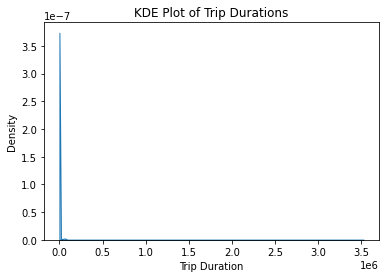

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
sns.kdeplot(data=train_data, x='trip_duration', fill=True)
plt.title('KDE Plot of Trip Durations')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.show()


## Count Plot

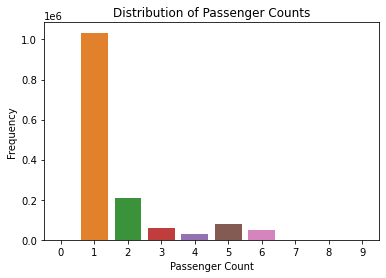

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_dataset' with your actual dataset
sns.countplot(data=train_data, x='passenger_count')
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()


## Test dataset predictions graph

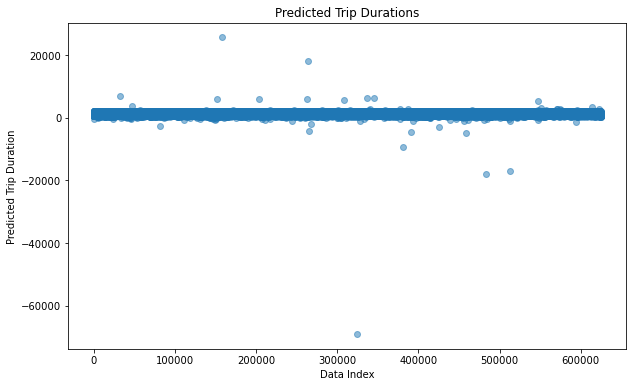

In [ ]:
# Predict trip durations on the test dataset
y_pred = pipeline.predict(X_test)

# Visualize the predicted trip durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5)
plt.xlabel("Data Index")
plt.ylabel("Predicted Trip Duration")
plt.title("Predicted Trip Durations")
plt.show()


# Gives preictions as a CSV file

In [7]:
# Predict trip durations on the preprocessed test dataset
y_pred = pipeline.predict(X_test)

# Create a DataFrame to hold the predictions
predictions_df = pd.DataFrame({'id': X_test['id'], 'predicted_duration': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


Dataset: [Train](https://drive.google.com/file/d/1__eB5gUp7Ap3CHPzsn75kYRgAHmf8XqY/view)
[Test](https://drive.google.com/file/d/1GcrhqniKObyqeTJMxKabld0CSGmZ2o92/view)